# Load datasets

In [147]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense



In [148]:
import pandas as pd
from sklearn.utils import shuffle

In [149]:
import numpy as np
import tensorflow as tf

In [150]:
def load_datasets(non_malicious_folder, malicious_folder):
    data = []
    labels = []

    # Load non-malicious files
    for filename in os.listdir(non_malicious_folder):
        if filename.endswith('.txt'):
            with open(os.path.join(non_malicious_folder, filename), 'r', encoding='utf-8', errors='ignore') as f:
                # read line by line
                for line in f:
                    data.append(line)
                    labels.append(0)  # Mark as non-malicious

    # Load malicious files
    for filename in os.listdir(malicious_folder):
        if filename.endswith('.txt'):
            with open(os.path.join(malicious_folder, filename), 'r', encoding='utf-8', errors='ignore') as f:
                # read line by line
                for line in f:
                    data.append(line)
                    labels.append(1)  # Mark as malicious


    return data, labels

# Load the datasets
non_malicious_folder = 'non_payload_datasets'
malicious_folder = 'payload_datasets'
data, labels = load_datasets(non_malicious_folder, malicious_folder)


In [151]:
# Convert the data and labels to a DataFrame for easier manipulation
df = pd.DataFrame({
    'data': data,
    'labels': labels
})

# Shuffle the DataFrame
df = shuffle(df)

# Convert back to lists
data = df['data'].tolist()
labels = df['labels'].tolist()

# Now you can proceed to vectorization and splitting the dataset...

# For understanding the data, you can print out some statistics
print("Total number of samples:", len(data))
print("Number of malicious samples:", sum(labels))
print("Number of non-malicious samples:", len(labels) - sum(labels))

# You can also print out a few example messages
for i in range(5):
    print("Sample message:", data[i])
    print("Label:", "Malicious" if labels[i] == 1 else "Non-malicious")


Total number of samples: 18435
Number of malicious samples: 12861
Number of non-malicious samples: 5574
Sample message: A cute thought for friendship: \Its not necessary to share every secret wi<style>@keyframes x{from {left:0;}to {left: 1000px;}}:target {animation:10s ease-in-out 0s 1 x;}</style><abbr id=x style="position:absolute;" onanimationcancel="alert(1)"></abbr>th ur close Frnd

Label: Malicious
Sample message: <applet onbeforecut="alert(1)" contenteditable>test</applet>

Label: Malicious
Sample message: Uh, heads up we don't have THAT much left

Label: Non-malicious
Sample message: ../../../../apache/logs/access.log

Label: Malicious
Sample message: <style>:target {color: red;}</style><var id=x style="transition:color 10s" ontransitioncancel=alert(1)></var>

Label: Malicious


In [152]:
# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply the vectorizer to the text data
X = vectorizer.fit_transform(data)

# Now X is a matrix where each row corresponds to a document and each column is a word.
# The value in each cell is the TF-IDF score of that word in that document.


In [153]:
X = vectorizer.fit_transform(data).toarray()  # Convert sparse matrix to dense array

# Split the dataset into training set and temporary set with a 60-40 split
X_temp, X_test, y_temp, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Then split the temporary set into validation and test sets with a 50-50 split
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Now we have a 60-20-20 split for training, validation, and testing


In [179]:
# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_val, y_val))


Epoch 1/20
1107/1107 [==============================] - 2s 1ms/step - loss: 0.1860 - accuracy: 0.9228 - val_loss: 0.1213 - val_accuracy: 0.9577
Epoch 2/20
1107/1107 [==============================] - 1s 1ms/step - loss: 0.0546 - accuracy: 0.9817 - val_loss: 0.1337 - val_accuracy: 0.9547
Epoch 3/20
1107/1107 [==============================] - 1s 1ms/step - loss: 0.0279 - accuracy: 0.9888 - val_loss: 0.1384 - val_accuracy: 0.9552
Epoch 4/20
1107/1107 [==============================] - 1s 1ms/step - loss: 0.0174 - accuracy: 0.9921 - val_loss: 0.1577 - val_accuracy: 0.9574
Epoch 5/20
1107/1107 [==============================] - 1s 985us/step - loss: 0.0139 - accuracy: 0.9938 - val_loss: 0.1552 - val_accuracy: 0.9607
Epoch 6/20
1107/1107 [==============================] - 1s 992us/step - loss: 0.0113 - accuracy: 0.9946 - val_loss: 0.1845 - val_accuracy: 0.9577
Epoch 7/20
1107/1107 [==============================] - 1s 990us/step - loss: 0.0081 - accuracy: 0.9967 - val_loss: 0.1834 - val_acc

In [180]:
print(model.summary())


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 32)                362848    
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                                                 
 dense_35 (Dense)            (None, 8)                 136       
                                                                 
 dense_36 (Dense)            (None, 1)                 9         
                                                                 
Total params: 363521 (1.39 MB)
Trainable params: 363521 (1.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [181]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


116/116 [==============================] - 0s 556us/step - loss: 0.2721 - accuracy: 0.9542

accuracy: 95.42%


116/116 [==============================] - 0s 531us/step


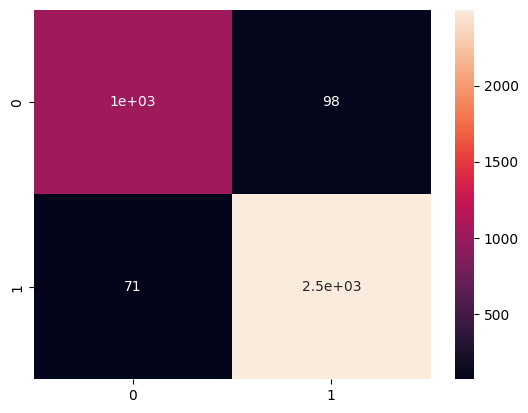

In [182]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()


In [183]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1118
           1       0.96      0.97      0.97      2569

    accuracy                           0.95      3687
   macro avg       0.95      0.94      0.95      3687
weighted avg       0.95      0.95      0.95      3687



In [184]:

# Find false positives
fp = []
fn = []
for i in range(len(y_test)):
    if y_test[i] == 0 and y_pred[i] == 1:
        fp.append(i)
    elif y_test[i] == 1 and y_pred[i] == 0:
        fn.append(i)



In [185]:
# Create reverse mapping
index_to_word = {v: k for k, v in vectorizer.vocabulary_.items()}

# Function to convert TF-IDF vectors to text
def tfidf_to_text(vector):
    # Get the indices of the non-zero elements in the vector
    nz = vector.nonzero()[1]

    # Map each index back to its word and join them into a string
    text = ' '.join(index_to_word[i] for i in nz)

    return text

print(len(fp), "false positives")
print(len(fn), "false negatives")
print(f"Test length {len(y_test)}")



98 false positives
71 false negatives
Test length 3687


In [186]:
# Example usage:
i=0
for index in fp:
    i+=1
    if i > 30:
        break
    print(tfidf_to_text(X_test[index:index+1]))

also and atm be carolina for go gre just north pay results sent site test texas the to would you
certainly happens into it like perspective puts something things this when
erutupalam thandiyachu
album had love mi on out phone stereo the turns under unknown
able anyway be breathing bud down get guy half hey him is know my neck some to tonight track usf you
away compliments from how side system the to was you your
argh it lool massage ok pos taxt tie
amt arun can me transfr
08001950382 100txt 12mths 2optout 2price 500 call d3wv free linerental mins mobileupd8 motorola mth net nokia on or tooth upto with
drop dsn emotion even evry good happy hav if is keep lik morning of othrwise prayrs smile smiling so stay tear wish wit words world
asia better but buy car china common decimal expensive find from gt here holla if it its less ll lt not or so to
09061104276 75max blu call can claim concert congratulations cost cs gift guaranteed in net november or row smsco tickets to ts vip www
and go res

In [187]:
i=0
for index in fn:
    i+=1
    if i > 30:
        break
    print(tfidf_to_text(X_test[index:index+1]))

08000839 and call double etc free hv9d linerental mins mobileupd8 motorola nokia on or or2optout orange passwd402 price sonyericsson tooth txts with your
already big changes cos da is made previous report ur ve
29
and boot boston changed confearch cuz didn do gave grub guess it location mean men my nyc on once page re right says signin something still that to up wow you
ambitious bit drink easy guess mate quick the was
burrito exec rajas right tacos xp_regread
amp area before call can clock coveragd have httpsd in log me number of out plz reach shows so ssl_log to urgnt var vasai you your
accept as belovd best1 brother bstfrnd clos1 cutefrnd day dear1 enemy is jstfrnd lifpartnr lover lvblefrnd me means net no pkgsrc pureftpd rply sister swtheart today usr
and color come dreams give good has make moon muli4vli4vli4vli4vli4vli4vli4vli4vli4vli4vli4vli4vzxrjl3bhc3n3zcuwma my night peaceful sical sleep sms stars them to warm you your
08718723815 awaiting call collect collection currently ha

In [188]:
test_string = "Hi how are you doing <script>  alert('hello')   </script> This is a legit message I promise you, no kapp on a stack"
test_string = "How are you Uwu :) >:3 (╯°□°）╯︵ ┻━┻"
test_string = "Hey I sent you my script. Please alert me when you receive it."

# Convert the string to a TF-IDF vector
test_vector = vectorizer.transform([test_string]).toarray()

# predict the test data
y_pred = model.predict(test_vector)
y_pred = (y_pred > 0.5)

print("Malicious" if y_pred[0] == 1 else "Non-malicious")

1/1 [==============================] - 0s 8ms/step
Malicious


/Users/loyd/PycharmProjects/ML-experiments/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
